# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2

from import_file import*

# Load Saved DataFrame

In [2]:
path = Path.cwd() / "processed_data" / "df_bi_B.pkl"
df = pd.read_pickle(path)

In [3]:
# Specifiying features and labels
X = df['statement']
y = df['label']

In [4]:
# Specifying train and test split with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0, stratify=y)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

10268 2568
10268 2568


# Defining functions

In [5]:
stemmer = PorterStemmer()

def tokenizer(input_string):
    words = re.sub(r"[^A-Za-z0-9-]", " ", input_string) # Replace everything except a-zA-Z0-9- by a space
    words = words.lower() # Lower casing
    words = words.split() # Split a string into a list  
    words = [stemmer.stem(word) for word in words] #Stemming
    return words

In [6]:
# Stopwords list set to english
stopwords_list = stopwords.words('english')

In [7]:
def print_results():
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    #model_accuracy.append(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [8]:
def display_confusion_matrix(cm, classes, title='Confusion Matrix'):
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    size = (10, 8)
    fig, ax = plt.subplots(figsize = size)
    sns.heatmap(df_cm, annot=True, cmap="Blues", center=0, fmt='g')
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')
    plt.title(title)

# Create pipeline

In [9]:
pipe1 = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='word',tokenizer=tokenizer,stop_words=stopwords_list)),
    ('transformer', TfidfTransformer()),
    ('clf', LogisticRegression(solver='liblinear', random_state=0))
])

# Fit the model using training set

In [10]:
# Fit the model using training set
pipe1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function tokenizer at 0x000001241FA61EE0>)),
                ('transformer', TfidfTransformer()),
                ('clf',
                 LogisticRegression(random_state=0, solver='liblinear'))])

# Test the model

In [11]:
y_pred = pipe1.predict(X_test)

In [12]:
print_results() 

Accuracy:  0.6495327102803738
              precision    recall  f1-score   support

        Fake       0.68      0.88      0.77      1662
       Truth       0.51      0.22      0.31       906

    accuracy                           0.65      2568
   macro avg       0.59      0.55      0.54      2568
weighted avg       0.62      0.65      0.60      2568

[[1466  196]
 [ 704  202]]


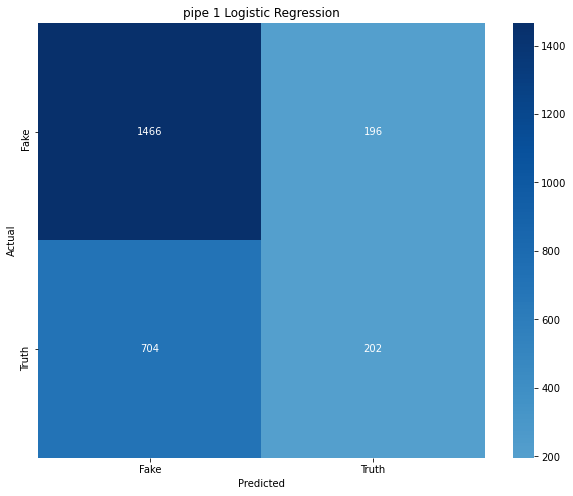

In [13]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), pipe1.classes_, 'pipe 1 Logistic Regression')